# Our Firts LangGraph graph!

Risorse [qui](https://github.com/iamvaibhavmehra/LangGraph-Course-freeCodeCamp)

Insegnante [Vaibhav Mehra](https://www.linkedin.com/in/vaibhav-mehra-main/)

In [4]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [ ]:
# Agent state . Shared data structure that keeps track of information as your application runs.
class AgentState(TypedDict): # Our State Schema
    """
    Agent state that is shared across the graph.
    """
    message: str

def greeting_node(state: AgentState) -> AgentState:
    """
    Simple node that adds a greeting message to the state.
    """
    
    state['message'] = "Hey" + state['message'] + ", how is your day going?"
    return state

In [8]:
graph = StateGraph(AgentState)

graph.add_node(
    "greeter", # node name
    greeting_node, # action function
)

graph.set_entry_point("greeter")  # Set the entry point of the graph
graph.set_finish_point("greeter")  # Set the finish point of the graph

app = graph.compile()  # Compile the graph

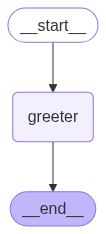

In [9]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))  # Display the graph image

In [10]:
result = app.invoke({"message": " John"})  # Invoke the graph with initial state


In [11]:
result["message"]

'Hey John, how is your day going?'

## Exercise 
Create e Personlized Compliment Agent using LangGraph.

`Input :{"name": "Bob"}
Output: "Bob, you're doing an amazing job learning LangGraph!"`


In [13]:
# Agent state . Shared data structure that keeps track of information as your application runs.
class AgentStateBis(TypedDict): # Our State Schema
    """
    Agent state that is shared across the graph.
    """
    message: str

def compliment_node(state: AgentState) -> AgentState:
    """
    Simple node that adds a compliment message to the state.
    """
    
    state['message'] = state['message'] + ", you are doing an amazing job learning LangGraph!"
    return state

In [14]:
graph = StateGraph(AgentState)

graph.add_node(
    "complimenter", # node name
    compliment_node, # action function
)

graph.set_entry_point("complimenter")  # Set the entry point of the graph
graph.set_finish_point("complimenter")  # Set the finish point of the graph

app = graph.compile()  # Compile the graph

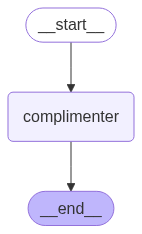

In [15]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))  # Display the graph image

In [17]:
result = app.invoke({"message": "Bob"})  # Invoke the graph with initial state
result["message"]

'Bob, you are doing an amazing job learning LangGraph!'

## Graph with multiple inputs
- Define a more complex `AgentState`
- Create a processing node that performs operation on list data.
- Set up a `LangGraph` that processes and outputs computed results.
- Invoce the graph with structured inputs and retrieve outputs.

In [18]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [19]:
# State Schema
class AgentState(TypedDict):
    """
    Agent state that is shared across the graph.
    """
    values: List[int]
    name: str
    result: str

In [39]:
def process_values(state: AgentState) -> AgentState:
    """This function handles multiple different inputs"""
    print(state)

    state['result'] = f"Hi there {state['name']}! your sum = {sum(state['values'])}"
    print(state)
    return state

In [40]:
graph = StateGraph(AgentState)

graph.add_node(
    "processor",  # node name
    process_values,  # action function
)
graph.set_entry_point("processor")  # Set the entry point of the graph
graph.set_finish_point("processor")  # Set the finish point of the graph
app = graph.compile()  # Compile the graph

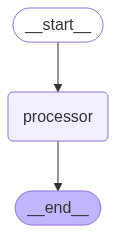

In [41]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))  # Display the graph image

In [42]:
response = app.invoke({
    "values": [1, 2, 3, 4, 5],
    "name": "Alice"
})  # Invoke the graph with initial state


{'values': [1, 2, 3, 4, 5], 'name': 'Alice'}
{'values': [1, 2, 3, 4, 5], 'name': 'Alice', 'result': 'Hi there Alice! your sum = 15'}


In [43]:
response

{'values': [1, 2, 3, 4, 5],
 'name': 'Alice',
 'result': 'Hi there Alice! your sum = 15'}

In [44]:
response['result']  # Access the result from the state

'Hi there Alice! your sum = 15'

## Exercise 2

Create a Graph where you pass in asingle list of integers along with a name and an operazione. If the operation is a "+", you add the element and if is a "*", you multiply the lements, all within the same node.

Intput: {"name":"Jack Sparrow", "values":[1,2,3,4], "operation": "*"}
Output: "Hi Jack Sparrow, your answer is 24"

In [45]:
from typing import TypedDict, List
from langgraph.graph import StateGraph
# State Schema

class AgentState(TypedDict):
    """
    Agent state that is shared across the graph.
    """
    values: List[int]
    name: str
    operator: str
    result: str

In [57]:
def process_values(state: AgentState) -> AgentState:
    """This function handles multiple different inputs and performs an operation based on the operator."""

    if state['operator'] == '+':
        state['result'] = f"Hi {state['name']}, your answer is {sum(state['values'])}"
    elif state['operator'] == '*':
        from math import prod 
        state['result'] = f"Hi {state['name']}, your answer is {prod(state['values'])}"
    return state

In [58]:
graph = StateGraph(AgentState)
graph.add_node(
    "processor",  # node name
    process_values,  # action function
)
graph.set_entry_point("processor")  # Set the entry point of the graph
graph.set_finish_point("processor")  # Set the finish point of the graph
app = graph.compile()  # Compile the graph


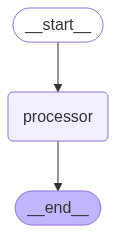

In [59]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))  # Display the graph image

In [60]:
answer = app.invoke({
    "values": [1, 2, 3, 4, 5],
    "name": "Alice",
    "operator": "+"
})  # Invoke the graph with initial state

In [61]:
answer['result']  # Access the result from the state

'Hi Alice, your answer is 15'

In [62]:
answer = app.invoke({
    "values": [1, 2, 3, 4, 5],
    "name": "Veronica",
    "operator": "*"
})  # Invoke the graph with initial state

In [64]:
answer['result']  # Access the result from the state

'Hi Veronica, your answer is 120'

## Sequentianl Graphs
- Create multiple Nodes that sequentially process and update different parts of the state.
- Connect Nodes together in a graph
- Invoke the graph and see how the state is transformetd step by step

In [65]:
from typing import TypedDict
from langgraph.graph import StateGraph

# State Schema
class AgentState(TypedDict):
    """
    Agent state that is shared across the graph.
    """
    name: str
    age: str
    final: str

In [85]:
# Build our 2 action function

def first_node(state: AgentState) -> AgentState:
    """
    First node of our sequence.
    """
    state['final'] = f"Hi {state['name']}, "
    return state

def second_node(state: AgentState) -> AgentState:
    """
    Second node of our sequence.
    """
    state['final'] = state['final'] + f"You are {state['age']} years old!"
    return state

In [86]:
graph = StateGraph(AgentState)

graph.add_node(
    "first",  # node name
    first_node,  # action function
)
graph.add_node(
    "second",  # node name
    second_node,  # action function
)

graph.set_entry_point("first")  # Set the entry point of the graph
graph.add_edge("first", "second")  # Add an edge from first to second node
graph.set_finish_point("second")  # Set the finish point of the graph
app = graph.compile()  # Compile the graph




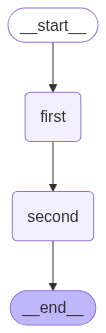

In [87]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))  # Display the graph image

In [88]:
answer = app.invoke({"name": "Alice", "age": "30"})  # Invoke the graph with initial state

In [89]:
print(answer)  # Access the final message from the state

{'name': 'Alice', 'age': '30', 'final': 'Hi Alice, You are 30 years old!'}


## Exercise
- Accept a user's name, age and a list of their skills.
- Pass the state throough 3 nodes that:
    - First node: Personilized the name field with a greeting
    - Second node: Describe the user's age
    - Third node: LIst the user's skills in a formatted string
- The final output in the result field should be a combined message in this format:

**Output** "Linda, welcome to the system! you are 31 years old! You have skills in: Python, Machine Learning and LangGraph"

In [3]:
from typing import TypedDict, List
from langgraph.graph import StateGraph
# State Schema
class AgentState(TypedDict):
    """
    Agent state that is shared across the graph.
    """
    name: str
    age: str
    skills: List[str]
    result: str

In [4]:
def greeting_node(state: AgentState) -> AgentState:
    """
    Simple node that adds a greeting message to the state.
    """
    state['result'] = f"Hi {state['name']}"
    return state

def age_node(state: AgentState) -> AgentState:
    """
    Simple node that adds an age message to the state.
    """
    state['result'] = state['result'] + f", you are {state['age']} years old"
    return state

def skills_node(state: AgentState) -> AgentState:
    """
    Simple node that adds a skills message to the state.
    """
    if state['skills']:
        state['result'] = state['result'] + f", and you have skills in {', '.join(state['skills'])}."
    else:
        state['result'] = state['result'] + ", and you have no skills listed."
    return state

In [5]:
graph = StateGraph(AgentState)
graph.add_node(
    "greeter",  # node name
    greeting_node,  # action function
)
graph.add_node(
    "ager",  # node name
    age_node,  # action function
)
graph.add_node(
    "skiller",  # node name
    skills_node,  # action function
)
graph.set_entry_point("greeter")  # Set the entry point of the graph
graph.add_edge("greeter", "ager")  # Add an edge from greeter to age node
graph.add_edge("ager", "skiller")  # Add an edge from age to skills node
graph.set_finish_point("skiller")  # Set the finish point of the graph
app = graph.compile()  # Compile the graph

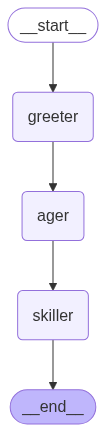

In [6]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))  # Display the graph image

In [7]:
answer = app.invoke({
    "name": "Veronica",
    "age": "40",
    "skills": ["Python", "Machine Learning","LangGraph"]
})  # Invoke the graph with initial state
print(answer['result'])  # Access the final message from the state

Hi Veronica, you are 40 years old, and you have skills in Python, Machine Learning, LangGraph.


## Conditional Graph

Conditional logic to route the flow of data to different nodes
- Use **START** and **END** nodes to manage entry and exit point explicitly.
- Desing multiple nodes to perform different operations (addition, subtraction)
- Create a **router node** to handle decision-making and control flow

**GOAL**: Use add_contitional_edges()


In [9]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

# State Schema
class AgentState(TypedDict):
    """
    Agent state that is shared across the graph.
    """
    number1: int
    number2: int
    operation: str
    finalNumber:int

In [14]:
def adder(state: AgentState) -> AgentState:
    """
    Node that adds two numbers.
    """
    state['finalNumber'] = state['number1'] + state['number2']
    return state
def subtractor(state: AgentState) -> AgentState:
    """
    Node that subtract two numbers.
    """
    state['finalNumber'] = state['number1'] - state['number2']
    return state

def decide_next_node(state: AgentState) -> str:
    """
    Node that decides which operation to perform based on the input.
    """
    if state['operation'] == '+':
        return 'addition_operation'
    elif state['operation'] == '-':
        return 'subtraction_operation'
    else:
        raise ValueError("Invalid operation. Use 'add' or 'subtract'.")

In [19]:
graph = StateGraph(AgentState)
graph.add_node(
    "router",  # node name
    lambda state:state,  # pass-through function
)
graph.add_node(
    "add_node",  # node name
    adder,  # action function
)
graph.add_node(
    "subtract_node",  # node name
    subtractor,  # action function
)

graph.add_edge(START, "router")  # Set the entry point of the graph

graph.add_conditional_edges(
    "router",  # node name
    decide_next_node,  # function to decide next node
    {
        # Edge: Node
        'addition_operation': 'add_node',  # edge for addition operation
        'subtraction_operation': 'subtract_node',  # edge for subtraction operation
    }
)
graph.add_edge("add_node", END)  # Set the finish point for addition
graph.add_edge("subtract_node", END)  # Set the finish point for subtraction
app = graph.compile()  # Compile the graph



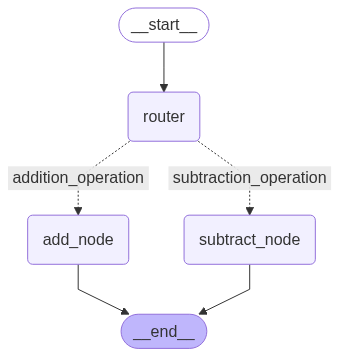

In [20]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))  # Display the graph image

## Exercise Graph with 2 conditional nodes

**input**: initial_state = AgentState(number1=10, operation="-", number2=5, number3=7,number4=2,operation2="+",finalNumber=0, finalNumber2=0)

In [21]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END

# State Schema
class AgentState(TypedDict):
    """
    Agent state that is shared across the graph.
    """
    number1: int
    number2: int
    operation: str
    result: int
    number3: int
    number4: int
    operation2: str
    result2: int

# action functions
def adder(state: AgentState) -> AgentState:
    """
    Node that adds two numbers.
    """
    state['result'] = state['number1'] + state['number2']
    return state
def subtractor(state: AgentState) -> AgentState:
    """
    Node that subtract two numbers.
    """
    state['result'] = state['number1'] - state['number2']
    return state

def decide_next_node(state: AgentState) -> str:
    """
    Node that decides which operation to perform based on the input.
    """
    if state['operation'] == '+':
        return 'addition_operation'
    elif state['operation'] == '-':
        return 'subtraction_operation'
    else:
        raise ValueError("Invalid operation. Use '+' or '-'.")

def adder2(state: AgentState) -> AgentState:
    """
    Node that adds two numbers.
    """
    state['result2'] = state['number3'] + state['number4']
    return state
def subtractor2(state: AgentState) -> AgentState:
    """
    Node that subtract two numbers.
    """
    state['result2'] = state['number3'] - state['number4']
    return state
def decide_next_node2(state: AgentState) -> str:
    """
    Node that decides which operation to perform based on the input.
    """
    if state['operation2'] == '+':
        return 'addition_operation2'
    elif state['operation2'] == '-':
        return 'subtraction_operation2'
    else:
        raise ValueError("Invalid operation. Use '+' or '-'.")

In [24]:
graph = StateGraph(AgentState)

graph.add_node(
    "router",  # node name
    lambda state: state,  # pass-through function
)
graph.add_node(
    "add_node",  # node name
    adder,  # action function
)
graph.add_node(
    "subtract_node",  # node name
    subtractor,  # action function
)
graph.add_node(
    "router2",  # node name
    lambda state: state,  # pass-through function
)
graph.add_node(
    "add_node2",  # node name
    adder2,  # action function
)
graph.add_node(
    "subtract_node2",  # node name
    subtractor2,  # action function
)
graph.add_edge(START, "router")  # Set the entry point of the graph
graph.add_conditional_edges(
    "router",  # node name
    decide_next_node,  # function to decide next node
    {
        # Edge: Node
        'addition_operation': 'add_node',  # edge for addition operation
        'subtraction_operation': 'subtract_node',  # edge for subtraction operation
    }
)
graph.add_edge("add_node", "router2")  # Set the finish point for addition
graph.add_edge("subtract_node", "router2")  # Set the finish point for subtraction
graph.add_conditional_edges(
    "router2",  # node name
    decide_next_node2,  # function to decide next node
    {
        # Edge: Node
        'addition_operation2': 'add_node2',  # edge for addition operation
        'subtraction_operation2': 'subtract_node2',  # edge for subtraction operation
    }
)
graph.add_edge("add_node2", END)  # Set the finish point for addition
graph.add_edge("subtract_node2", END)  # Set the finish point for subtraction
app = graph.compile()  # Compile the graph

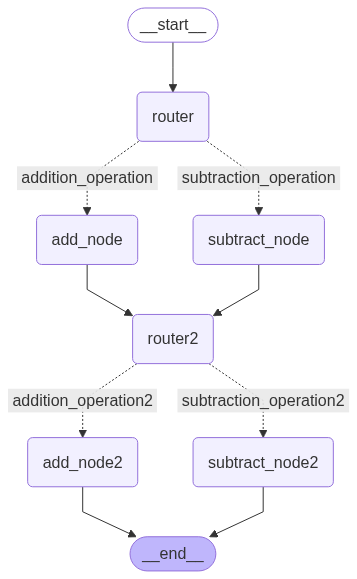

In [25]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))  # Display the graph image

In [27]:
response = app.invoke({
    "number1": 10,
    "number2": 5,
    "operation": "+",
    "number3": 20,
    "number4": 10,
    "operation2": "-"
})  # Invoke the graph with initial state

print(response['result'])  # Access the result from the first operation
print(response['result2'])  # Access the result from the second operation
response

15
10


{'number1': 10,
 'number2': 5,
 'operation': '+',
 'result': 15,
 'number3': 20,
 'number4': 10,
 'operation2': '-',
 'result2': 10}

## Last Graph - Looping Graph
- Implement looping logic to route the flow of data back to nodes
- Create a single conditional edge to handle decision-making and control graph flow

![](image/loppong.png)

In [2]:
from langgraph.graph import StateGraph, END
import random
from typing import Dict, List, TypedDict

# State Schema
class AgentState(TypedDict):
    """
    Agent state that is shared across the graph.
    """
    name: str
    number: List[int]
    counter: int
    

In [3]:
# node functions
def greeting_node(state: AgentState) -> AgentState:
    """
    Node that greets the user.
    """
    state['name'] = f"Hello {state['name']}!"
    state['counter'] = 0

    return state

def random_number_node(state: AgentState) -> AgentState:
    """
    Node that generates a random number and adds it to the state.
    """
    state['number'].append(random.randint(1, 10))
    state['counter'] += 1

    return state

def should_continue(state: AgentState) -> str:
    """
    Node that decides whether to continue or finish based on the counter.
    """
    if state['counter'] < 5:
        print("Entering LOOP, state['counter']:", state['counter'])

        return "loop" # continue looping
    else:
        return "exit"  # exit the loop

In [ ]:
# create the graph
graph = StateGraph(AgentState)
graph.add_node(
    "greeting",  # node name
    greeting_node,  # action function
)
graph.add_node(
    "random_number",  # node name
    random_number_node,  # action function
)
graph.set_entry_point("greeting")  # Set the entry point of the graph
graph.add_edge("greeting", "random_number")  # Add an edge from greeting to random_number node

graph.add_conditional_edges(
    "random_number",  # node name
    should_continue,  # function to decide next node
    {
        # Edge: Node
        "loop": "random_number",  # continue looping
        "exit": END,  # exit the loop
    }
)
app = graph.compile()  # Compile the graph


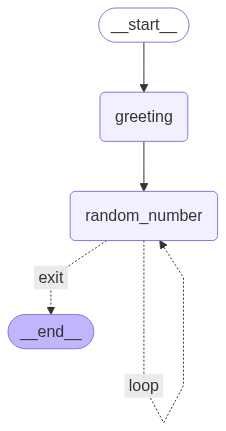

In [5]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))  # Display the graph image

In [13]:
answer = app.invoke({"name": "Veronica", "number": [], "counter":-1})  # Invoke the graph with initial state

Entering LOOP, state['counter']: 1
Entering LOOP, state['counter']: 2
Entering LOOP, state['counter']: 3
Entering LOOP, state['counter']: 4


In [14]:
answer

{'name': 'Hello Veronica!', 'number': [4, 1, 6, 6, 10], 'counter': 5}

In [15]:
print(answer['number'])  # View generated random numbers

[4, 1, 6, 6, 10]


## Exercise Looping
![](image/exercise_graph_5.png)

Realizzare il grafico dell'immagine, implementando **Automatic Higher or Lower Game**

Set the bounds to between 1 to 20. The graph has to keep guessing (**max number of guesses is 7) where the guess is correct, then it stops, but if not we keep looping until we hit the max limit of 7.

Each time a number is guessed, the **hint node should say higher or lower** and the graph should account for this information and guess the next guess accordingly.

**Input**: {"player_name":"Student", "guesses":[],"attempts":0, "lower_bound":1, "upper_bound":20}

**Hint** it will need to adjust its bounds after every guess based on the hint provided by the hint node.

In [16]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, END

# State Schema
class AgentState(TypedDict):
    """
    Agent state that is shared across the graph.
    """
    player_name: str
    guesses: List[int]
    attempts: int
    lower_bound: int
    upper_bound: int
    target_number: int
    hint: str

# Node functions
def setup_game(state: AgentState) -> AgentState:
    """
    Node that sets up the game with initial values.
    """
    state['player_name'] = f"Welcome {state['player_name']}!"
    state['target_number'] = random.randint(state['lower_bound'], state['upper_bound'])
    state['guesses'] = []
    state['attempts'] = 0
    state['hint'] = f"Game started! Guess a number between {state['lower_bound']} and {state['upper_bound']}."
    state['lower_bound'] = 1
    state['upper_bound'] = 20
    
    print(f"Random number generated: {state['target_number']}")  # For debugging purposes
    
    return state

def make_guess(state: AgentState) -> AgentState:
    """
    Node that processes the player's guess.
    """
    possible_guesses = [i for i in range(state['lower_bound'], state['upper_bound'] + 1) if i not in state['guesses']]

    if possible_guesses:
        guess = random.choice(possible_guesses)
    else:
        guess = random.randint(state['lower_bound'], state['upper_bound'])
    state['guesses'].append(guess)
    state['attempts'] += 1
    print(f"Attempt {state['attempts']}: Guessing {guess} (Current range: {state['lower_bound']}-{state['upper_bound']})")  # For debugging purposes

    return state

def hint_node(state: AgentState) -> AgentState:
    """
    Node that provides a hint based on the player's guess.
    """
    latest_guess = state['guesses'][-1]
    target = state['target_number']
    if latest_guess < target:
        state['hint'] = f"Your guess {latest_guess} is too low! Try a higher number."
        state['lower_bound'] = max(state['lower_bound'], latest_guess + 1)
        print(f"Hint: {state['hint']} (New lower bound: {state['lower_bound']})")  # For debugging purposes
    elif latest_guess > target:
        state['hint'] = f"Your guess {latest_guess} is too high! Try a lower number."
        state['upper_bound'] = min(state['upper_bound'], latest_guess - 1)
        print(f"Hint: {state['hint']} (New upper bound: {state['upper_bound']})")
    else:
        state['hint'] = f"Congratulations {state['player_name']}! You've guessed the number {target} in {state['attempts']} attempts!"
        print(state['hint'])
   
    return state

def should_continue(state: AgentState) -> str:
    """
    Node that decides whether to continue or finish based on the player's guess.
    """
    latest_guess = state['guesses'][-1]
    if latest_guess == state ['target_number']:
        print("Exiting game, player guessed the number!")
        return "end"  # exit the game
    elif state['attempts'] >=7:
        state['hint'] = f"Sorry {state['player_name']}, you've used all your attempts! The number was {state['target_number']}."
        print(state['hint'])
        return "end"
    else:
        print(f"Continuing game, player has not guessed the number yet. {state['attempts']}/7 attempts made.")
        return "continue"

In [25]:
graph = StateGraph(AgentState)
graph.add_node(
    "setup",  # node name
    setup_game,  # action function
)
graph.add_node(
    "guess",  # node name
    make_guess,  # action function
)
graph.add_node(
    "clue",  # node name
    hint_node,  # action function
)
graph.set_entry_point("setup")  # Set the entry point of the graph
graph.add_edge("setup", "guess")  # Add an edge from setup to guess node
graph.add_edge("guess", "clue")  # Add an edge from guess to clue node
graph.add_conditional_edges(
    "clue",  # node name
    should_continue,  # function to decide next node
    {
        # Edge: Node
        "continue": "guess",  # continue guessing
        "end": END,  # end the game
    }
)

app = graph.compile()  # Compile the graph

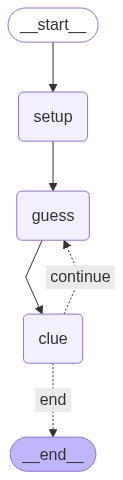

In [26]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))  # Display the graph image

In [27]:
result = app.invoke({
    "player_name": "Alice",
    "guesses": [],
    "attempts": 0,
    "lower_bound": 1,
    "upper_bound": 20
})

Random number generated: 13
Attempt 1: Guessing 11 (Current range: 1-20)
Hint: Your guess 11 is too low! Try a higher number. (New lower bound: 12)
Continuing game, player has not guessed the number yet. 1/7 attempts made.
Attempt 2: Guessing 18 (Current range: 12-20)
Hint: Your guess 18 is too high! Try a lower number. (New upper bound: 17)
Continuing game, player has not guessed the number yet. 2/7 attempts made.
Attempt 3: Guessing 16 (Current range: 12-17)
Hint: Your guess 16 is too high! Try a lower number. (New upper bound: 15)
Continuing game, player has not guessed the number yet. 3/7 attempts made.
Attempt 4: Guessing 13 (Current range: 12-15)
Congratulations Welcome Alice!! You've guessed the number 13 in 4 attempts!
Exiting game, player guessed the number!
